In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

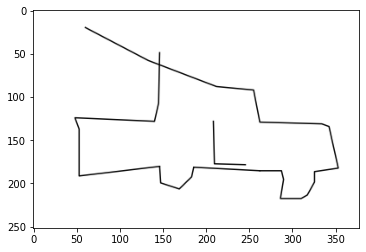

In [13]:
plt.imshow(Image.open('./data/car_train_data/car/102.jpg'));

In [14]:
!ls data/car_train_data/

car     not_car


# CNN

In [15]:
classifier = tf.keras.Sequential()

classifier.add(tf.keras.layers.Conv2D(32, (3 ,3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

classifier.add(tf.keras.layers.Conv2D(20, (3, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

classifier.add(tf.keras.layers.Conv2D(12, (3, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

classifier.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(activation='relu', units=128))
classifier.add(tf.keras.layers.Dense(activation='sigmoid', units=1))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 20)        5780      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 20)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 12)        2172      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 12)      

In [17]:
image_size = (128,128)
batch_size_chosen = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.2,
                                   rotation_range = 15,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('data/car_train_data/',
                                                    target_size=image_size,
                                                    batch_size=batch_size_chosen,
                                                    class_mode='binary')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_generator = test_datagen.flow_from_directory('data/car_test_data/',
                                                        target_size=image_size,
                                                        batch_size=batch_size_chosen,
                                                        class_mode='binary')

Found 131 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [18]:
!rm -r data/logs/

In [19]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                   min_delta=0,
                                   patience=3,
                                   verbose=1,
                                   mode='auto',
                                   restore_best_weights=True)

ts = tf.keras.callbacks.TensorBoard(log_dir='data/logs',
                                 histogram_freq=0,
                                 write_graph=True,
                                 write_grads=False,
                                 write_images=False,
                                 embeddings_freq=0,
                                 embeddings_layer_names=None,
                                 embeddings_metadata=None,
                                 embeddings_data=None,
                                 update_freq='epoch')

train_generator.class_indices

{'car': 0, 'not_car': 1}

In [20]:
classifier.fit_generator(train_generator,
                         steps_per_epoch=50,
                         epochs=3,
                         validation_data=validation_generator,
                         validation_steps=200,
                         workers=4,
                         callbacks=[es, ts])

/var/folders/0b/2vd83sj57l759q5x6tqmpsn40000gn/T/ipykernel_305/801637673.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(train_generator,


Epoch 1/3
50/50 [==============================] - 24s 476ms/step - loss: 0.3488 - accuracy: 0.8870 - val_loss: 0.3128 - val_accuracy: 0.9084
Epoch 2/3
50/50 [==============================] - 25s 494ms/step - loss: 0.3182 - accuracy: 0.9084 - val_loss: 0.3180 - val_accuracy: 0.9084
Epoch 3/3
50/50 [==============================] - 23s 468ms/step - loss: 0.3141 - accuracy: 0.9084 - val_loss: 0.3045 - val_accuracy: 0.9084


In [22]:
classifier.save('model/model.h5')

In [24]:
model = tf.keras.models.load_model('model/model.h5')

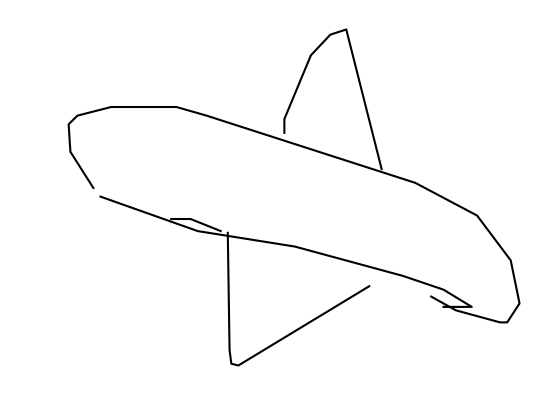

In [27]:
Image.open('data/car_test_data/not_car/airplane_77.jpg')

In [29]:
img = np.array(Image.open('data/car_test_data/not_car/airplane_77.jpg').convert('RGB').resize((128,128))).reshape(1,128,128,3)*1/255
model.predict(img)

array([[0.89579326]], dtype=float32)

In [32]:
img = np.array(Image.open('data/car_test_data/car/103.jpg').convert('RGB').resize((128,128))).reshape(1,128,128,3)*1/255
model.predict(img)

array([[0.8936345]], dtype=float32)